Columns: Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

✅ Accuracy: 0.43
Precision: 0.39
Recall: 0.43

Classification Report:
              precision    recall  f1-score   support

        High       0.49      0.69      0.57       231
         Low       0.27      0.18      0.21       119
      Medium       0.30      0.18      0.22       129

    accuracy                           0.43       479
   macro avg       0.36      0.35      0.34       479
weighted avg       0.39      0.43      0.39       479



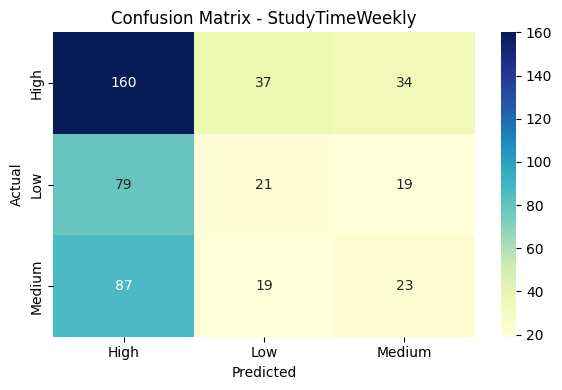

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# Load the dataset
df = pd.read_csv("8. Student Performance Prediction.csv")

# Display column names
print("Columns:", df.columns)

# Step 1: Binning StudyTimeWeekly if it's continuous
# (Custom binning to help classification)
if pd.api.types.is_numeric_dtype(df["StudyTimeWeekly"]):
    def bin_study_time(val):
        if val <= 5:
            return 'Low'
        elif val <= 10:
            return 'Medium'
        else:
            return 'High'
    df["StudyTimeWeekly_Binned"] = df["StudyTimeWeekly"].apply(bin_study_time)
    target_col = "StudyTimeWeekly_Binned"
else:
    target_col = "StudyTimeWeekly"

# Step 2: Encode target
target_encoder = LabelEncoder()
df[target_col] = target_encoder.fit_transform(df[target_col])
y = df[target_col]

# Step 3: Prepare features (drop StudyTimeWeekly and Absences)
drop_cols = ["StudyTimeWeekly", "StudyTimeWeekly_Binned", "Absences"]
X = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Step 4: Encode all categorical features
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Train model (Gradient Boosting Classifier)
model = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.08, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict
y_pred = model.predict(X_test)

# Step 9: Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')

print(f"\n✅ Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# Step 10: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - StudyTimeWeekly")
plt.tight_layout()
plt.show()
